In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import warnings

warnings.filterwarnings('ignore')

In [80]:
bundesliga = pd.read_csv('bundesliga.csv')
bundesliga2 = pd.read_csv('bundesliga2.csv')

In [81]:
bundesliga.head()

,SEASON,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTHG,FTAG,FTTG
0,1994,Bundesliga 1,1993-08-07,Bayern Munich,Freiburg,3-1,3,1,4
1,1994,Bundesliga 1,1993-08-07,Dortmund,Karlsruhe,2-1,2,1,3
2,1994,Bundesliga 1,1993-08-07,Duisburg,Leverkusen,2-2,2,2,4
3,1994,Bundesliga 1,1993-08-07,FC Koln,Kaiserslautern,0-2,0,2,2
4,1994,Bundesliga 1,1993-08-07,Hamburg,Nurnberg,5-2,5,2,7


In [82]:
bundesliga2.head()

,TEAM,M,W,D,L,GF,GA,DIFF,POINTS,POSITION,SEASON
0,Bayern Munich,34,17,10,7,68,37,31,61,1,1994
1,Kaiserslautern,34,18,7,9,64,36,28,61,2,1994
2,Dortmund,34,15,9,10,49,45,4,54,3,1994
3,Ein Frankfurt,34,15,8,11,57,41,16,53,4,1994
4,Leverkusen,34,14,11,9,60,47,13,53,5,1994


In [83]:
df = bundesliga

season_stats = df.groupby('SEASON').agg(
    TOTAL_GOALS=('FTTG', 'sum'),
    MATCHES=('FTTG', 'count'),
    AVG_GOALS=('FTTG', 'mean'),
    TOTAL_HOME_GOALS=('FTHG', 'sum'),
    TOTAL_AWAY_GOALS=('FTAG', 'sum'),
    AVG_HOME_GOALS=('FTHG', 'mean'),
    AVG_AWAY_GOALS=('FTAG', 'mean')
).reset_index()

## Part 1: Trend Analysis

1. Analyse trend of goals per season. For example total goals per match, average goals per match.

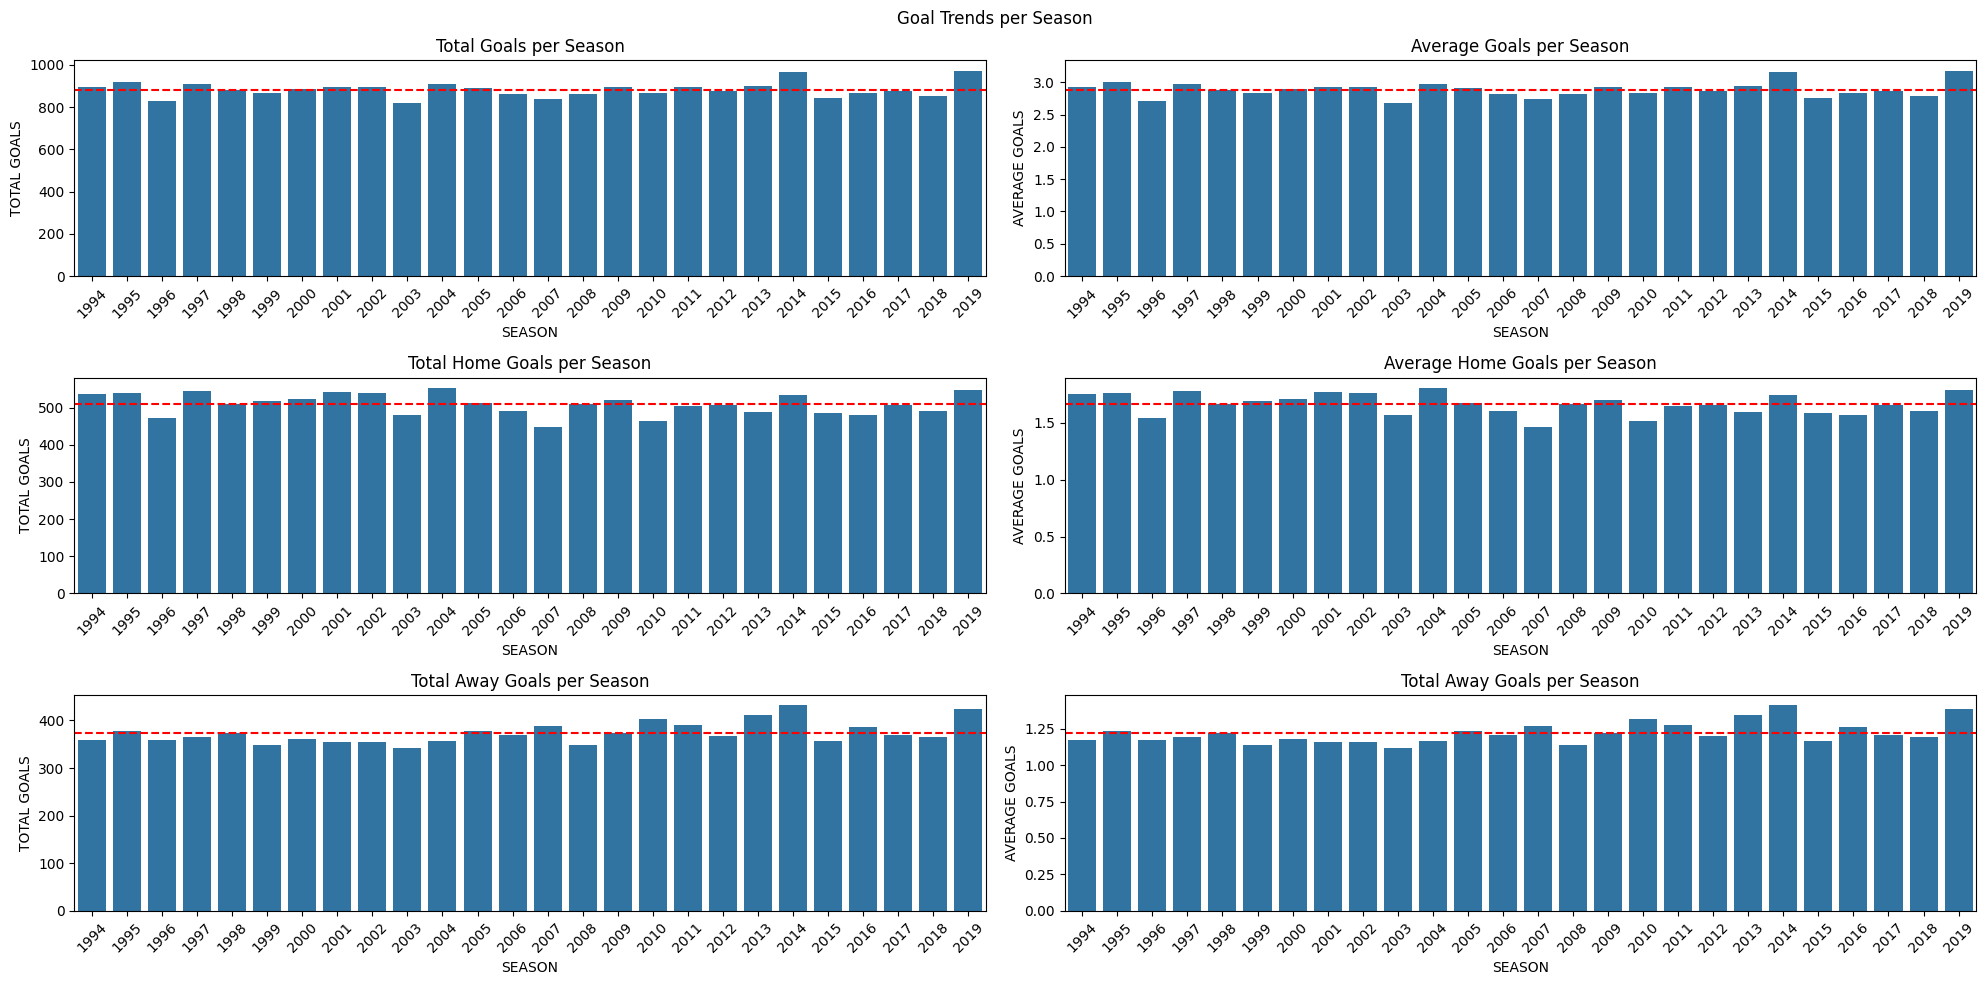

In [84]:
fig, ax = plt.subplots(3,2, figsize=(20,10))
sns.barplot(x='SEASON', y='TOTAL_GOALS', data=season_stats, ax=ax[0][0])
ax[0][0].set_title('Total Goals per Season')
ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=45)
ax[0][0].set_ylabel('TOTAL GOALS')
ax[0][0].axhline(y=season_stats['TOTAL_GOALS'].mean(), color='red', linestyle='--')

sns.barplot(x='SEASON', y='AVG_GOALS', data=season_stats, ax=ax[0][1]);
ax[0][1].set_title('Average Goals per Season')
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation=45)
ax[0][1].set_ylabel('AVERAGE GOALS')
ax[0][1].axhline(y=season_stats['AVG_GOALS'].mean(), color='red', linestyle='--')

sns.barplot(x='SEASON', y='TOTAL_HOME_GOALS', data=season_stats, ax=ax[1][0]);
ax[1][0].set_title('Total Home Goals per Season')
ax[1][0].set_xticklabels(ax[0][1].get_xticklabels(), rotation=45)
ax[1][0].set_ylabel('TOTAL GOALS')
ax[1][0].axhline(y=season_stats['TOTAL_HOME_GOALS'].mean(), color='red', linestyle='--')

sns.barplot(x='SEASON', y='AVG_HOME_GOALS', data=season_stats, ax=ax[1][1]);
ax[1][1].set_title('Average Home Goals per Season')
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation=45)
ax[1][1].set_ylabel('AVERAGE GOALS')
ax[1][1].axhline(y=season_stats['AVG_HOME_GOALS'].mean(), color='red', linestyle='--')

sns.barplot(x='SEASON', y='TOTAL_AWAY_GOALS', data=season_stats, ax=ax[2][0]);
ax[2][0].set_title('Total Away Goals per Season')
ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=45)
ax[2][0].set_ylabel('TOTAL GOALS')
ax[2][0].axhline(y=season_stats['TOTAL_AWAY_GOALS'].mean(), color='red', linestyle='--')

sns.barplot(x='SEASON', y='AVG_AWAY_GOALS', data=season_stats, ax=ax[2][1]);
ax[2][1].set_title('Total Away Goals per Season')
ax[2][1].set_xticklabels(ax[2][1].get_xticklabels(), rotation=45)
ax[2][1].set_ylabel('AVERAGE GOALS')
ax[2][1].axhline(y=season_stats['AVG_AWAY_GOALS'].mean(), color='red', linestyle='--')

plt.suptitle('Goal Trends per Season')
plt.tight_layout()
plt.show();

The partter seems to be stabel in every season (around 500 goals are scored); however there is a differnece in mean Home and mean Away goals where we can see that on average more home goals are scored in almost every year than away goals. Even the total number of scored Home goals is general larger than the number of away scored goals.

2. Goal Distribution Per Season. Use appropriate type of graphs for goals per match, year-wise. Color-
code by whether average is above or below 2.5 (over/under bet threshold).

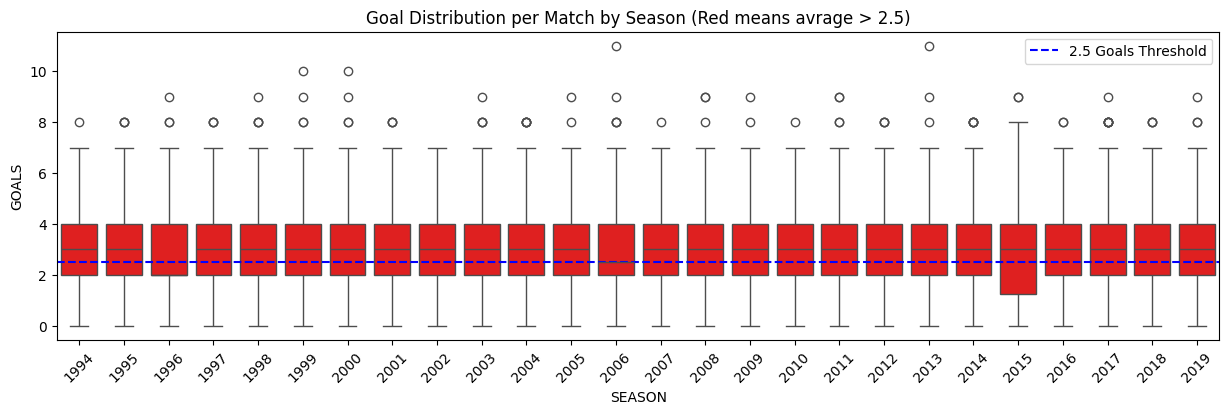

In [85]:
plt.figure(figsize=(15, 4))
sns.boxplot(x='SEASON', y='FTTG', data=df, 
            palette=['red' if avg > 2.5 else 'green' for avg in season_stats['AVG_GOALS']])
plt.axhline(y=2.5, color='blue', linestyle='--', label='2.5 Goals Threshold')
plt.title('Goal Distribution per Match by Season (Red means avrage > 2.5)')
plt.xticks(rotation=45)
plt.legend()
plt.ylabel('GOALS')
plt.show();

The graph shows that every year in 50% of games 2-4 goals are scored and in avarage more than 2.5 goals are scored per game. In some years we have some outliers but more or less the pattern is the same. The pattern is a bit different in 2015 when in 50% of matches 1-4 goals are scored. The medians are all equal(3) except 1996(coincides with on of the quartiles) and 2006(lower than 3).

3. Create line charts for each season. Visualize trend of goals for each team that played in that season.
Highlight only Bayern Munchen with red color. Rest should be gray. Add appropriate title that will
contain information about season and total scored goals. Add footnote mentioning total number of
goals scored by Bayern Munchen for that season. Save all graphs in pdf.

In [86]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year

In [87]:
away = df[['SEASON', 'AWAYTEAM', 'FTAG', 'DATE']]
home = df[['SEASON', 'HOMETEAM', 'FTHG', 'DATE']]
away=away.rename(columns={'FTAG': 'GOALS', 'AWAYTEAM':'TEAM'})
home=home.rename(columns={'FTHG': 'GOALS', 'HOMETEAM':'TEAM'})
goals = pd.concat([away, home])
goals



,SEASON,TEAM,GOALS,DATE
0,1994,Freiburg,1,1993-08-07
1,1994,Karlsruhe,1,1993-08-07
2,1994,Leverkusen,2,1993-08-07
3,1994,Kaiserslautern,2,1993-08-07
4,1994,Nurnberg,2,1993-08-07
...,...,...,...,...
7951,2019,Mainz,4,2019-05-18
7952,2019,M'gladbach,0,2019-05-18
7953,2019,Schalke 04,0,2019-05-18
7954,2019,Werder Bremen,2,2019-05-18


In [88]:
with PdfPages('bundesliga_season_trends.pdf') as pdf:
    for season in goals['SEASON'].unique():
        season_df = goals[goals['SEASON'] == season].sort_values("DATE")
        
        plt.figure(figsize=(18, 10))
        teams = season_df['TEAM'].unique()
        for i in teams:
            if i == 'Bayern Munich':
                color = 'red'
                bayern_total = goals['GOALS'].sum()
                l = 2
            else:
                color = 'gray'
                l = 0.5
            
            team_goals = season_df[season_df['TEAM'] == i].sort_values("DATE")
            plt.plot(team_goals['DATE'], team_goals['GOALS'], 
                    color=color, linewidth=l)
        
        season_total = season_df['GOALS'].sum()
        plt.title(f'Season {season} - Total Goals: {season_total}\nBayern Munich: {bayern_total} goals', pad=20)
        plt.xlabel('DATE')
        plt.ylabel('GOALS')
        
        plt.figtext(0.5, 0.01, f'Bayern Munich scored {bayern_total} goals in season {season}', 
                   ha='center', fontsize=10, style='italic')
        
        pdf.savefig()
        plt.close()

## Part 2: Home Advantage Deconstructed

In [89]:
heatmap_df = bundesliga
heatmap_df.head()

,SEASON,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTHG,FTAG,FTTG,YEAR
0,1994,Bundesliga 1,1993-08-07,Bayern Munich,Freiburg,3-1,3,1,4,1993
1,1994,Bundesliga 1,1993-08-07,Dortmund,Karlsruhe,2-1,2,1,3,1993
2,1994,Bundesliga 1,1993-08-07,Duisburg,Leverkusen,2-2,2,2,4,1993
3,1994,Bundesliga 1,1993-08-07,FC Koln,Kaiserslautern,0-2,0,2,2,1993
4,1994,Bundesliga 1,1993-08-07,Hamburg,Nurnberg,5-2,5,2,7,1993


In [90]:
heatmap_df['HOMEWIN'] = (heatmap_df['FTHG'] > heatmap_df['FTAG']).astype(int)
heatmap_df['AWAYWIN'] = (heatmap_df['FTAG'] > heatmap_df['FTHG']).astype(int)

1. Create Heatmap of Home vs. Away Wins per Team per Season

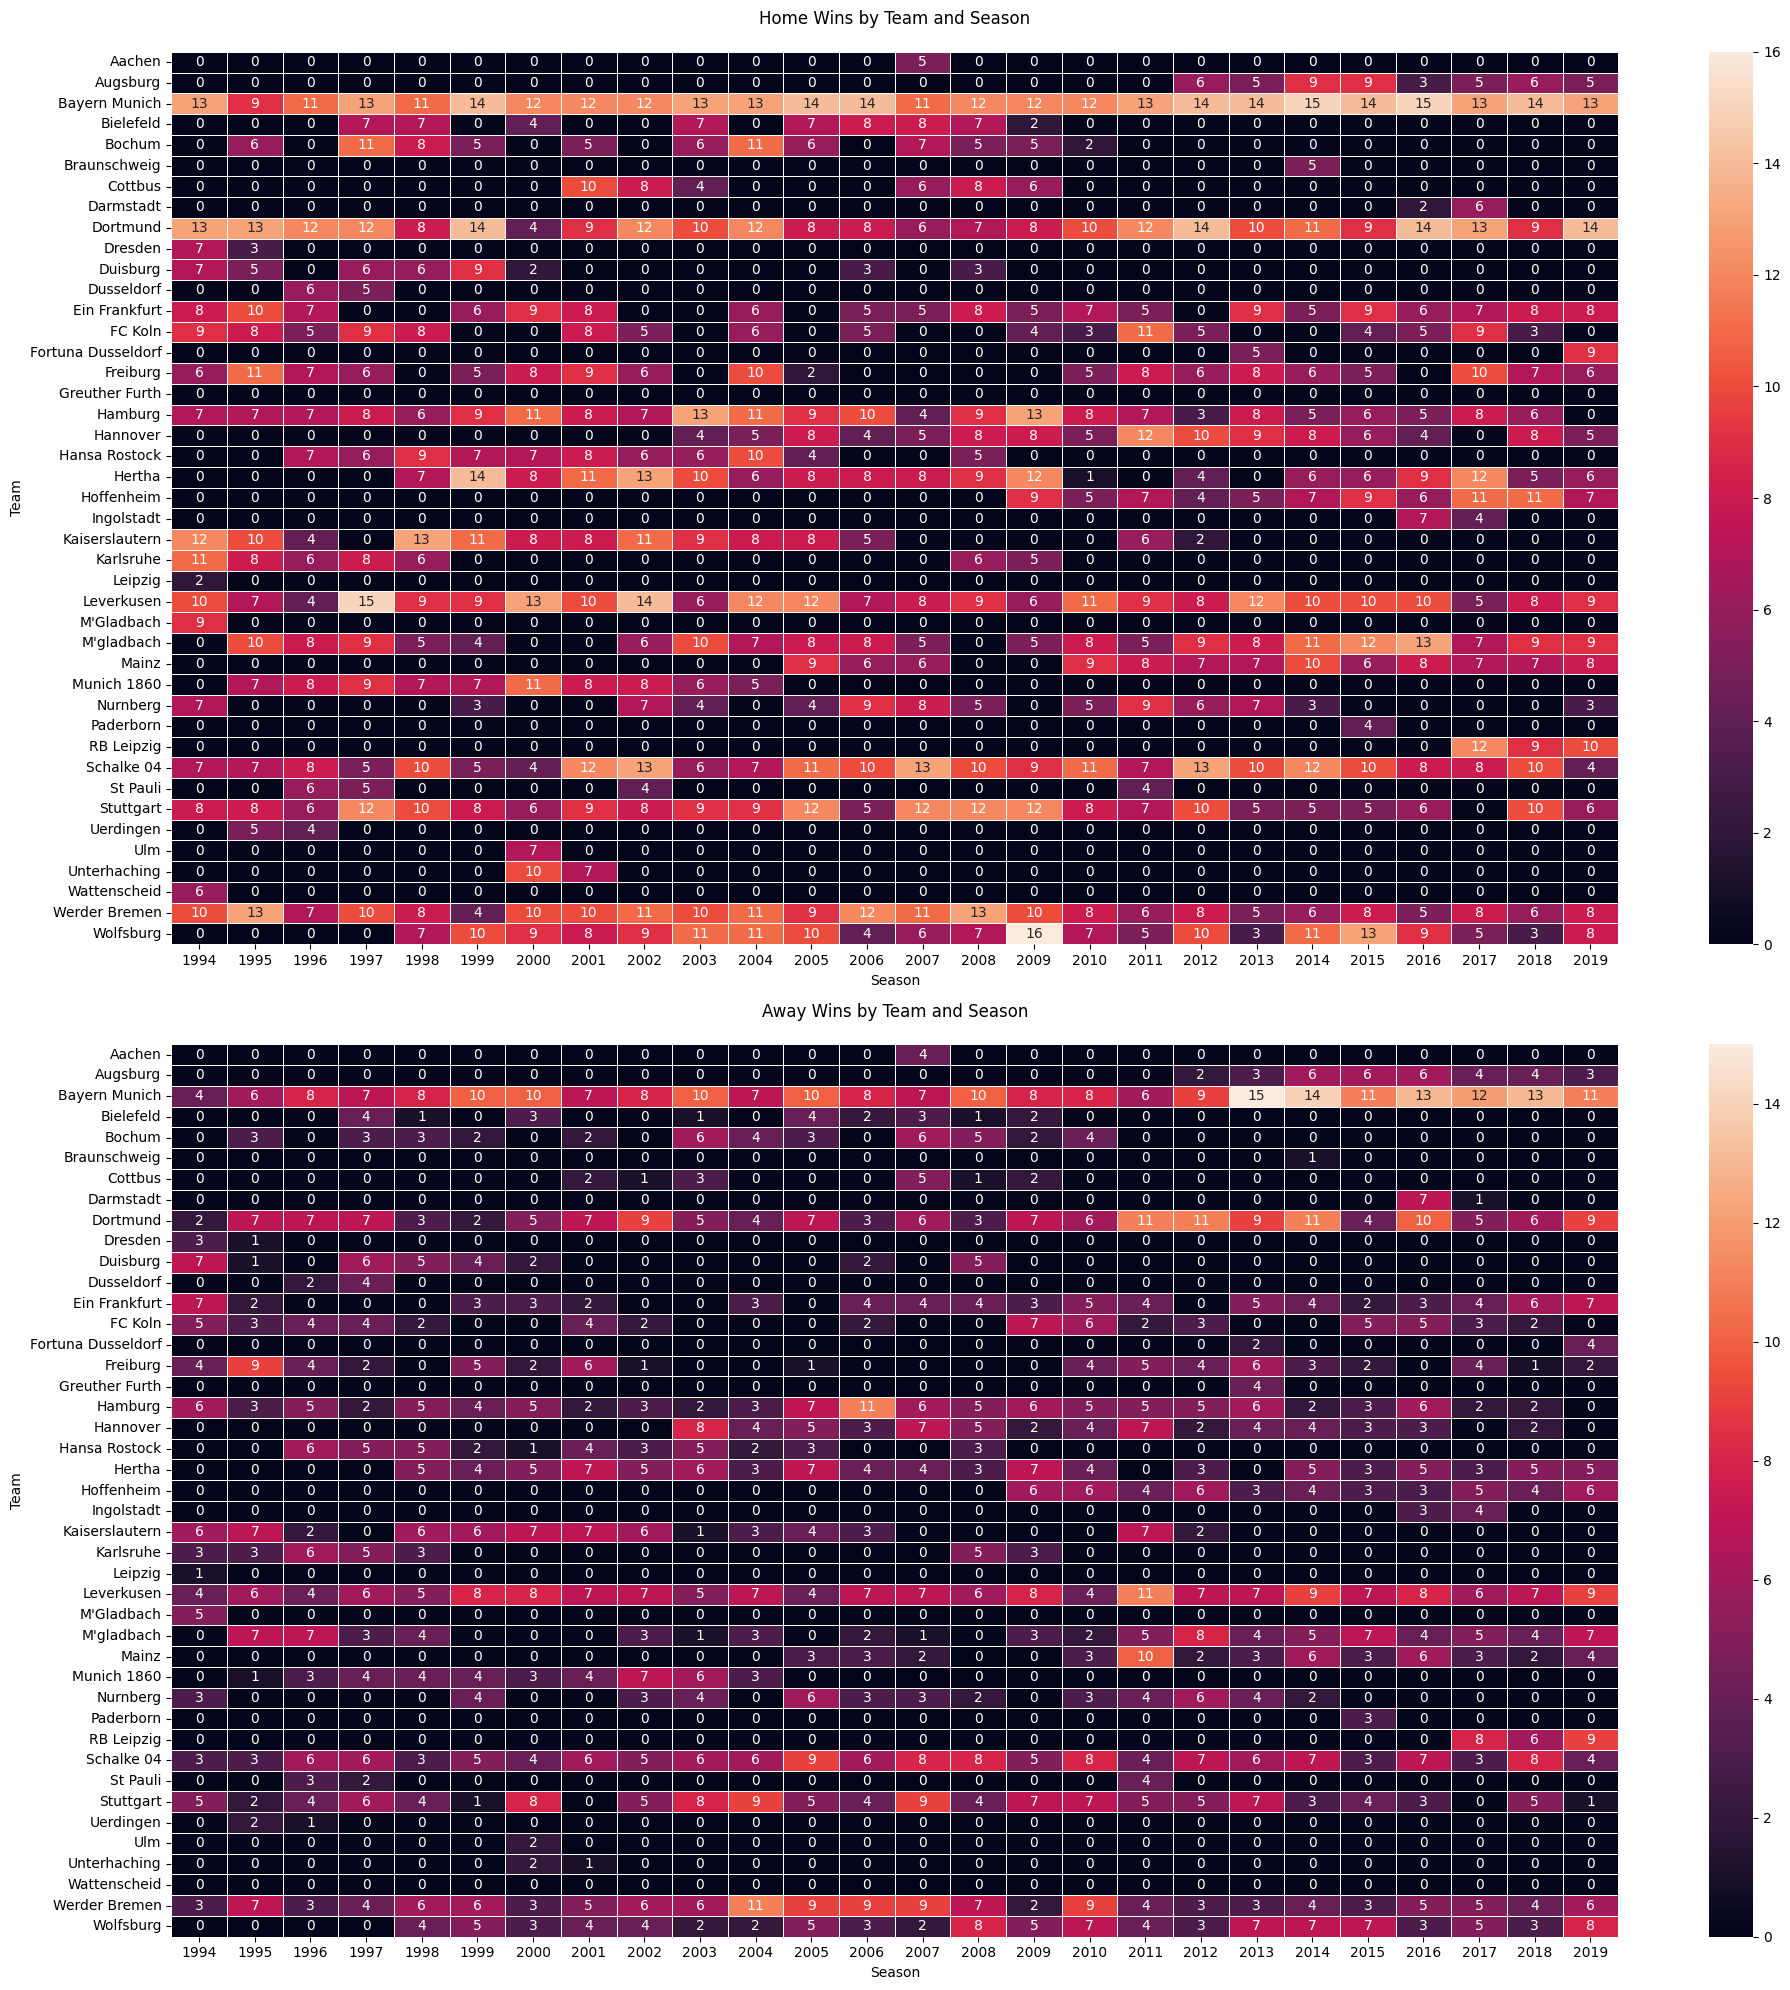

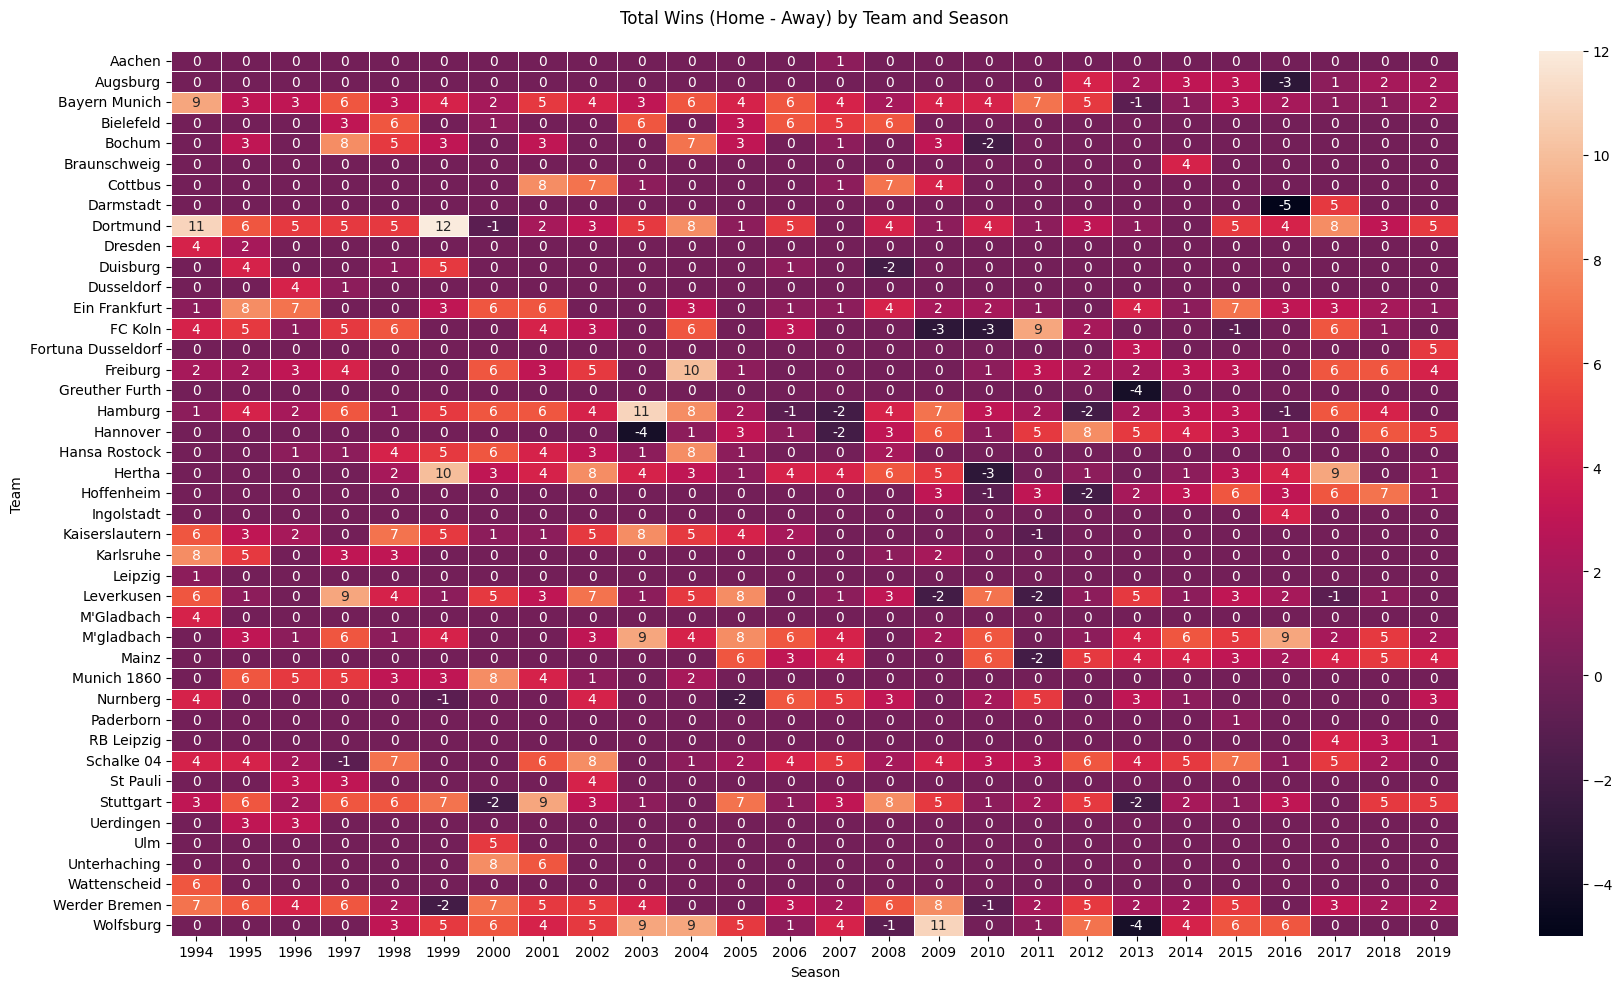

In [91]:
home_wins = heatmap_df.groupby(['SEASON', 'HOMETEAM']).sum().reset_index()[['SEASON', 'HOMETEAM', 'HOMEWIN']]
away_wins = heatmap_df.groupby(['SEASON', 'AWAYTEAM']).sum().reset_index()[['SEASON', 'AWAYTEAM', 'AWAYWIN']]

home_wins_pivot = home_wins.pivot(index='HOMETEAM', columns='SEASON', values='HOMEWIN').fillna(0)
away_wins_pivot = away_wins.pivot(index='AWAYTEAM', columns='SEASON', values='AWAYWIN').fillna(0)

home_wins.rename(columns={"HOMETEAM": 'TEAM'}, inplace=True)
away_wins.rename(columns={"AWAYTEAM": 'TEAM'}, inplace=True)

team_stats = pd.merge(home_wins, away_wins, on=['SEASON', 'TEAM'], how='outer').fillna(0)

team_stats['HOME-AWAY_WIN_DIFF'] = team_stats['HOMEWIN'] - team_stats['AWAYWIN']
team_stats['AWAY-HOME_WIN_DIFF'] = team_stats['AWAYWIN'] - team_stats['HOMEWIN']
diff_pivot = team_stats.pivot(index='TEAM', columns='SEASON', values='HOME-AWAY_WIN_DIFF').fillna(0)

plt.figure(figsize=(20, 20))

plt.subplot(2, 1, 1)
sns.heatmap(home_wins_pivot, annot=True, fmt='g', linewidths=0.5)
plt.title('Home Wins by Team and Season', pad=20)
plt.xlabel('Season')
plt.ylabel('Team')

plt.subplot(2, 1, 2)
sns.heatmap(away_wins_pivot, annot=True, fmt='g', linewidths=0.5)
plt.title('Away Wins by Team and Season', pad=20)
plt.xlabel('Season')
plt.ylabel('Team')

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 10))
sns.heatmap(diff_pivot, annot=True, fmt='g', linewidths=0.5)
plt.title('Total Wins (Home - Away) by Team and Season', pad=20)
plt.xlabel('Season')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

Clearly we can see that in most of the cases Home - Away wins is a positive number which means that teams perform better at their own staidums.

2. Point Differential Density: Create visualizations that will show difference per team for home and away
game wins.

In [92]:
team_stats

,SEASON,TEAM,HOMEWIN,AWAYWIN,HOME-AWAY_WIN_DIFF,AWAY-HOME_WIN_DIFF
0,1994,Bayern Munich,13,4,9,-9
1,1994,Dortmund,13,2,11,-11
2,1994,Dresden,7,3,4,-4
3,1994,Duisburg,7,7,0,0
4,1994,Ein Frankfurt,8,7,1,-1
...,...,...,...,...,...,...
463,2019,RB Leipzig,10,9,1,-1
464,2019,Schalke 04,4,4,0,0
465,2019,Stuttgart,6,1,5,-5
466,2019,Werder Bremen,8,6,2,-2


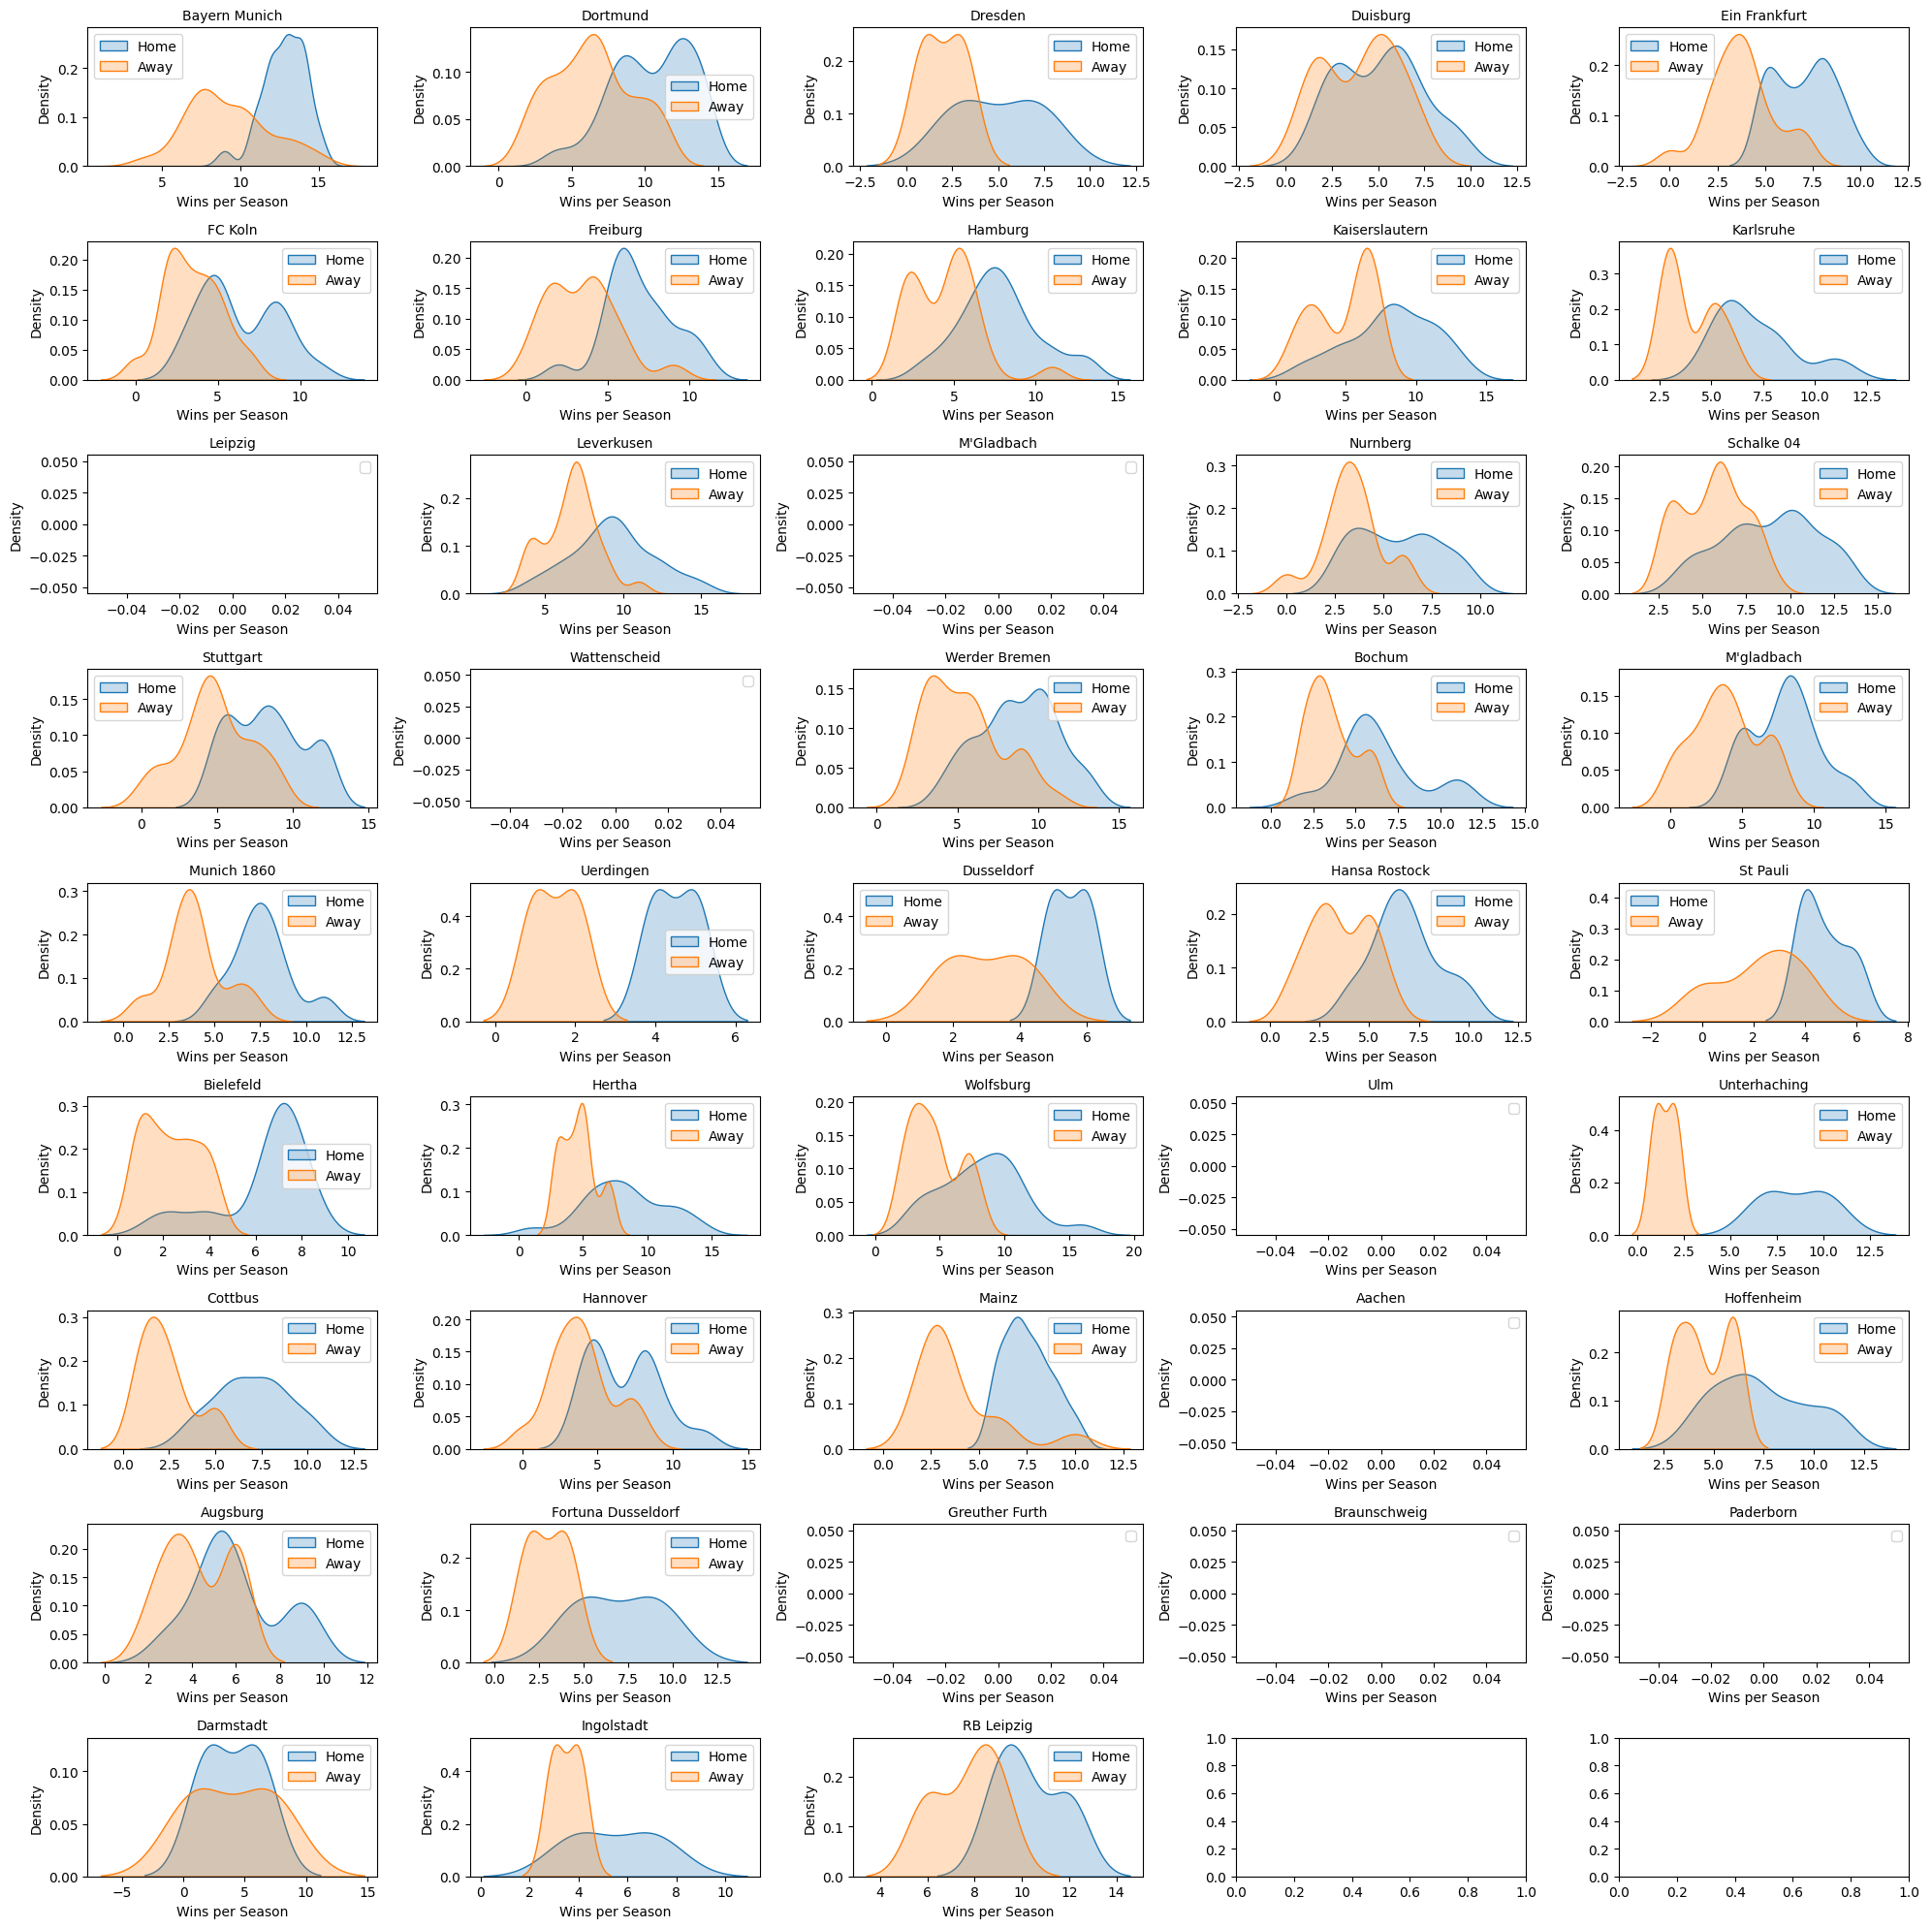

In [93]:
teams = team_stats['TEAM'].unique()
num_teams = len(teams)

fig, axes = plt.subplots(9, 5, figsize=(20,  20), constrained_layout=True)

axes = axes.flatten()

for i, team in enumerate(teams):
    ax = axes[i]
    team_df = team_stats[team_stats['TEAM'] == team]
    ax.set_xlabel('Wins per Season')
    sns.kdeplot(team_df['HOMEWIN'], ax=ax, fill=True, bw_adjust=0.7, label='Home')
    sns.kdeplot(team_df['AWAYWIN'], ax=ax, fill=True, bw_adjust=0.7, label='Away')
    ax.set_title(team, fontsize=10)
    ax.set
    ax.legend()

plt.tight_layout()


The same shows this density plot. In all cases the distribution of away wins is located to the left of the distribution of homewins on x-axis(which represents wins per season).

## Part 3:

1. Team Trajectories and Volatility


∙ Seasonal Position Trajectories.\
∙ Line plots showing seasonal ranks for top 6 teams.\
∙ Annotate title-winning seasons.

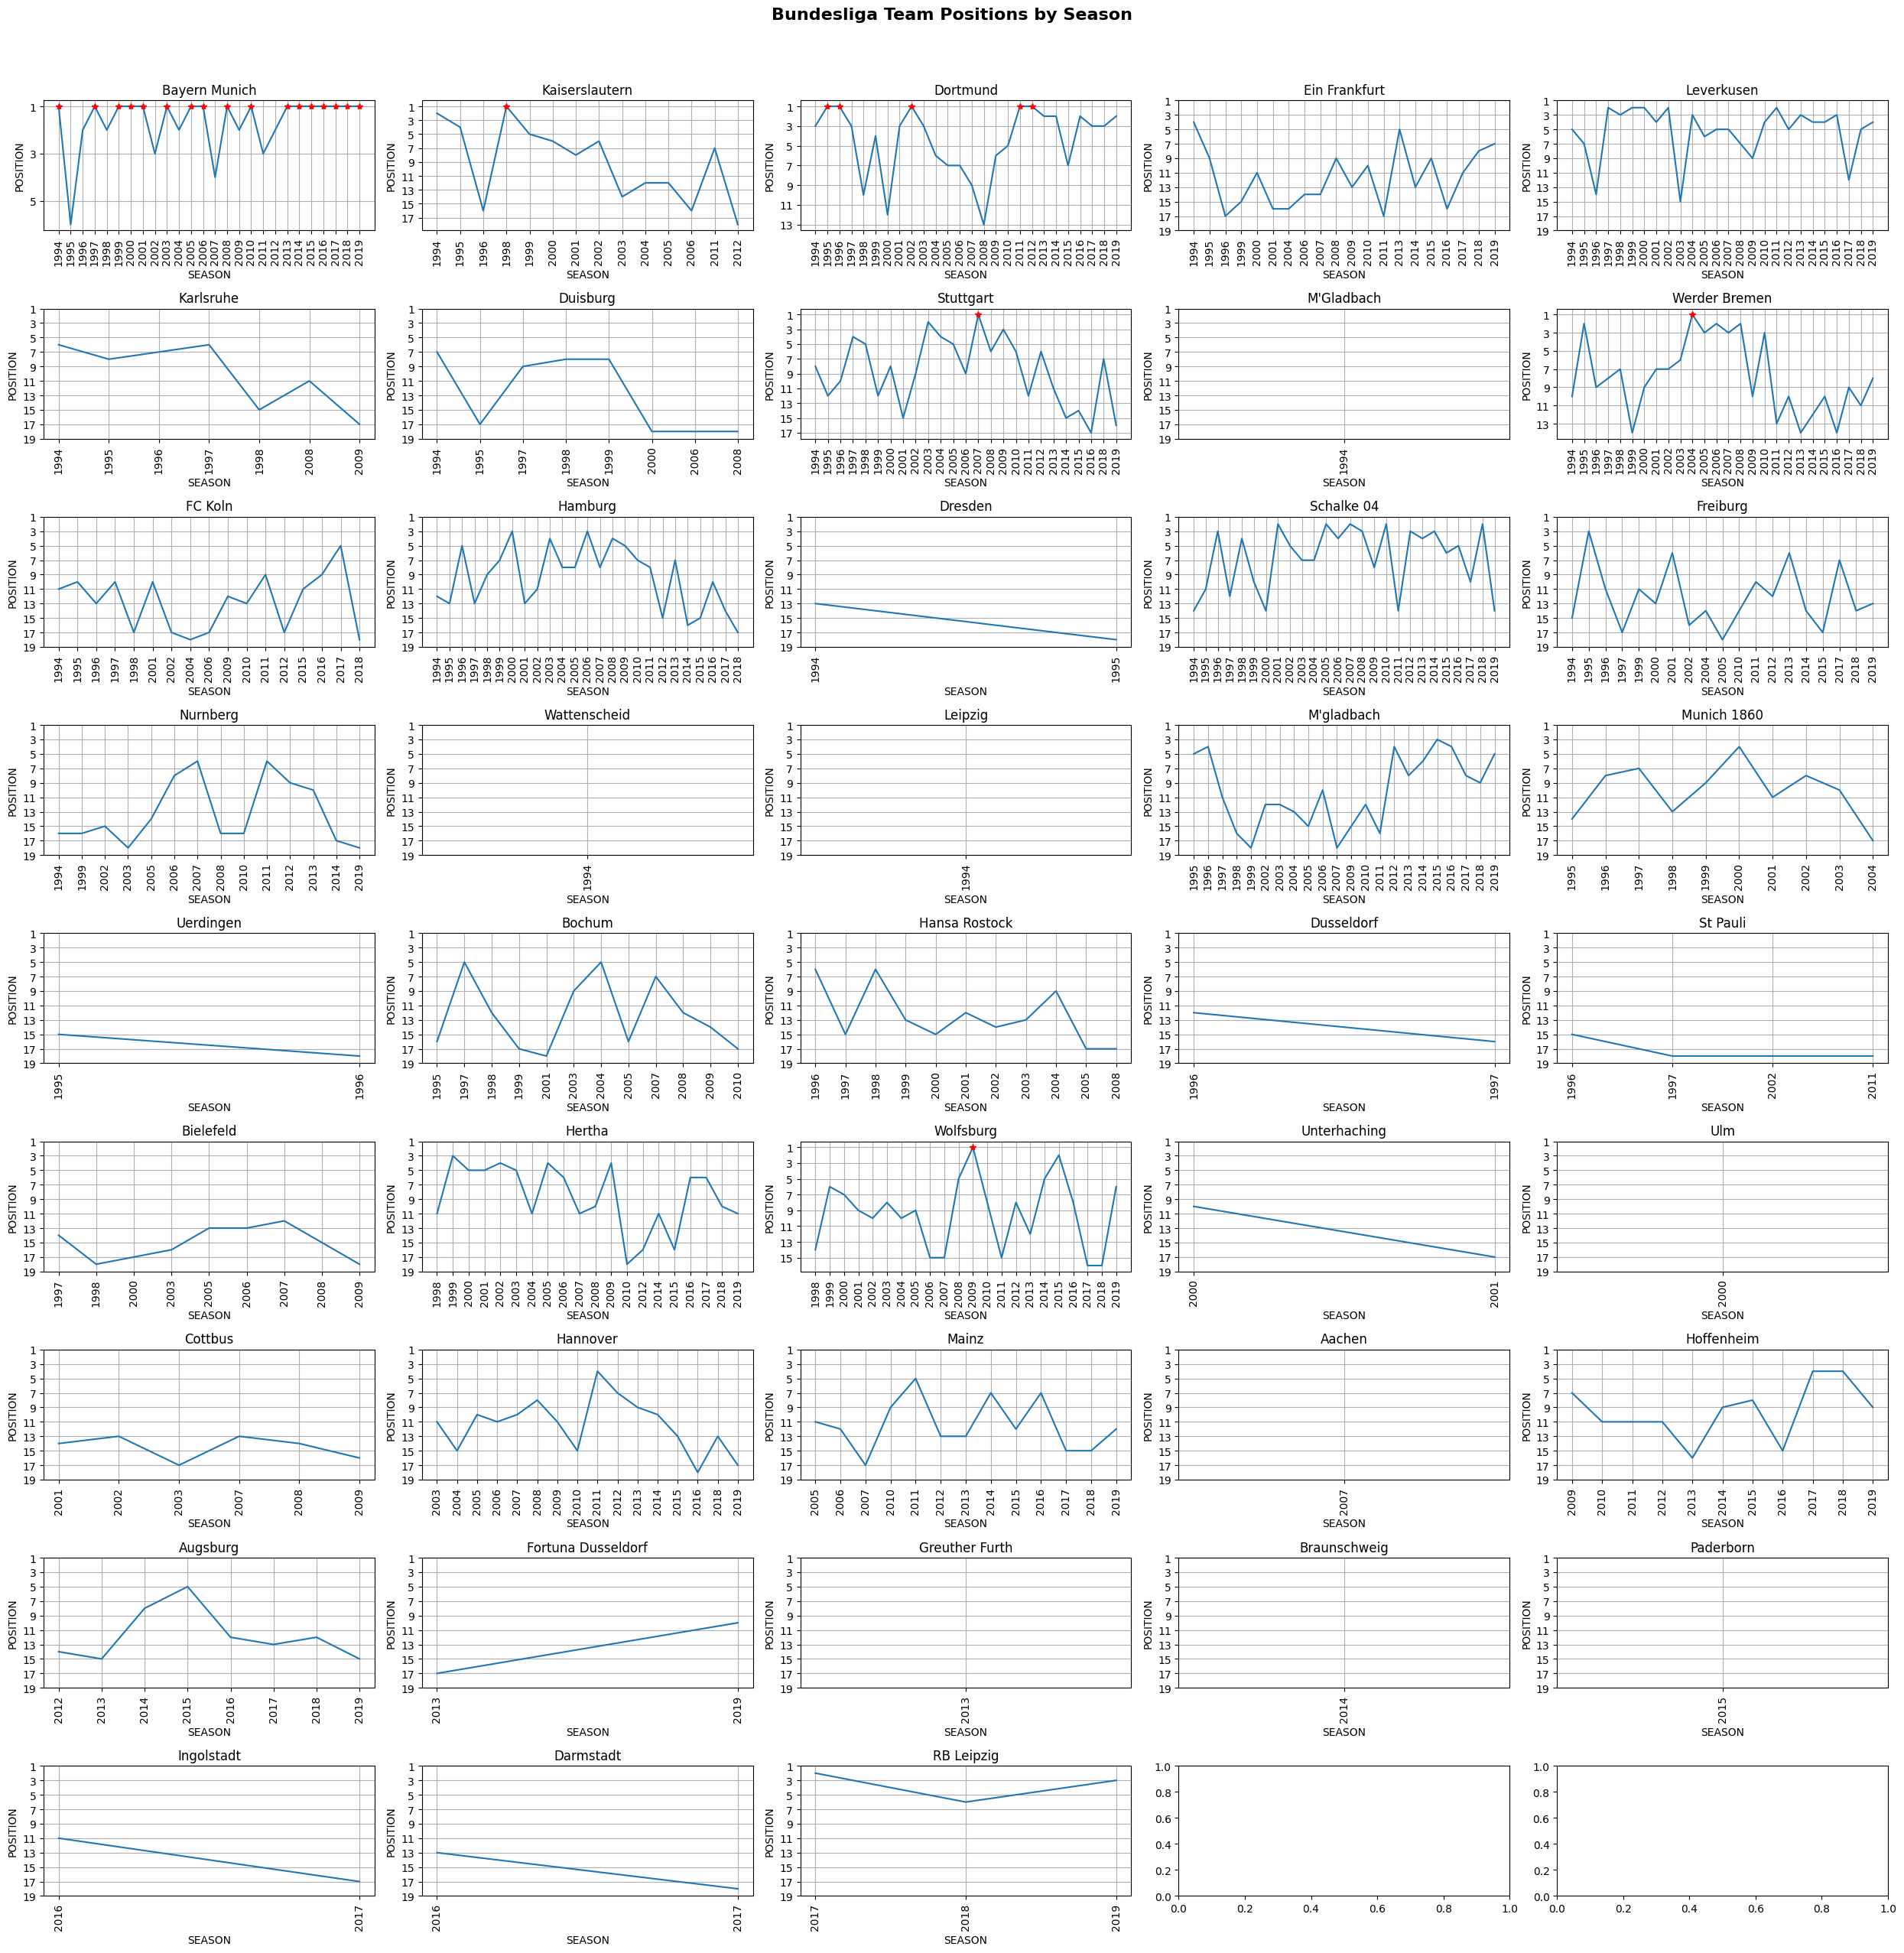

In [94]:
pos_df=bundesliga2
teams = pos_df.TEAM.unique()
pos_df['SEASON']=pos_df['SEASON'].astype(str)
fig, axes = plt.subplots(9, 5, figsize=(25,  25), constrained_layout=True)
axes = axes.flatten()
for i, team in enumerate(teams):
    ax = axes[i]
    team_df = pos_df[pos_df['TEAM'] == team]
    sns.lineplot(x='SEASON', y='POSITION', data=team_df, ax=ax)
    ax.set_title(f'{team}')
    ax.invert_yaxis()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticks(range(1,20,2))
    ax.grid()
    if 1 in team_df['POSITION'].values:
        champion_seasons = team_df[team_df['POSITION'] == 1]['SEASON']
        for season in champion_seasons:
            ax.plot(season, 1, '*', markersize=6, color='red')
plt.suptitle('Bundesliga Team Positions by Season', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()

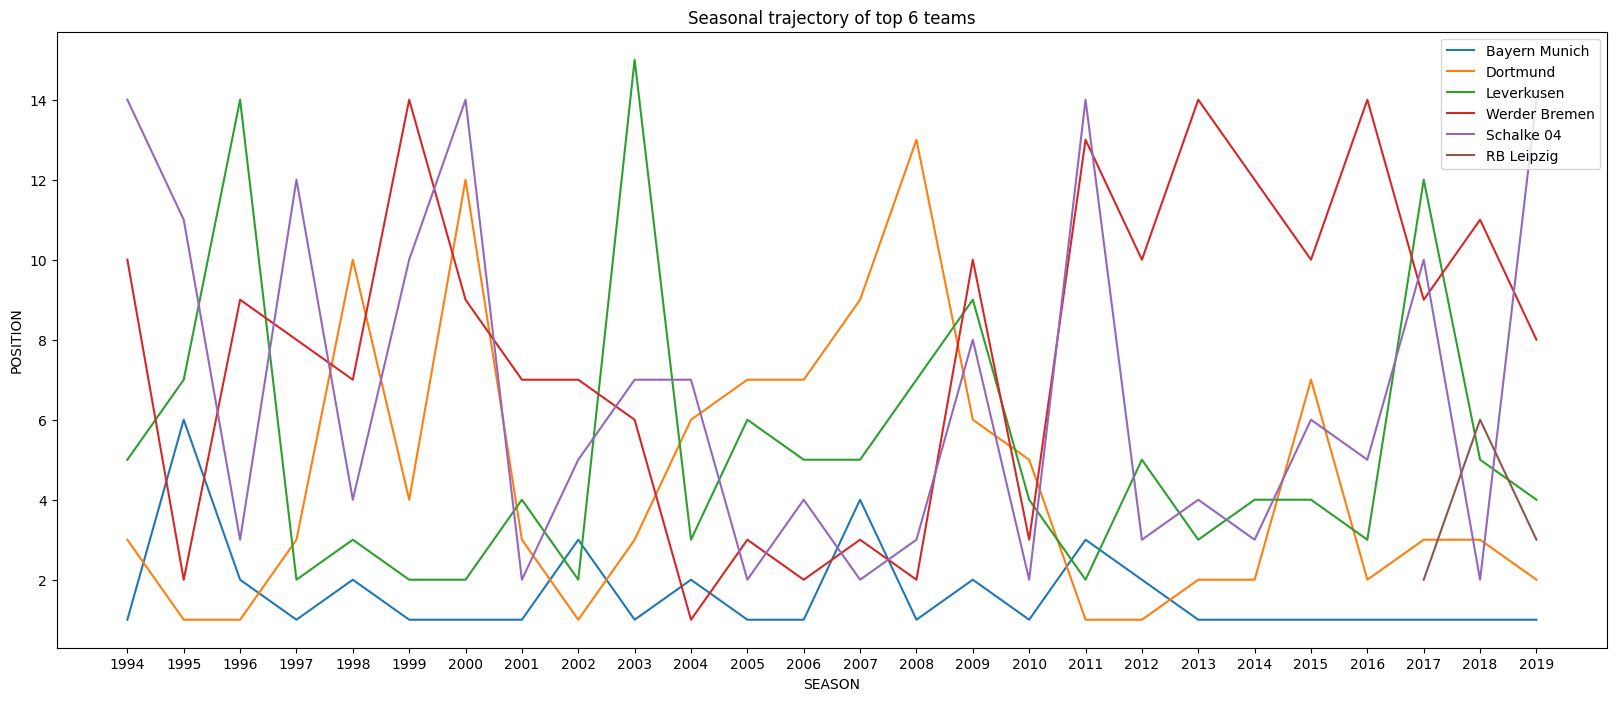

In [95]:
top_6_teams=pos_df.groupby('TEAM').mean().sort_values('POSITION').index[:6]

fig = plt.figure
fig(figsize=(20,8))
filtered_pos = pos_df[pos_df['TEAM'].isin(top_6_teams)]
sns.lineplot(data=filtered_pos, x='SEASON', y='POSITION', hue='TEAM')
ax.invert_yaxis()
plt.title('Seasonal trajectory of top 6 teams')
plt.legend(loc='upper right');


2. Volatility Index

• For each team, calculate standard deviation of final rank over all seasons.\
• Use a bar chart with conditional coloring (e.g., red = unstable, green = consistent).\
• Add text labels above each bar with exact values.

In [96]:
sd_pos=pos_df.groupby('TEAM').std().reset_index()[['TEAM', 'POSITION']].dropna()
sd_pos['POSITION']=round(sd_pos['POSITION'], 2)

If we assume that having <1.5 standart deviation is considered to be stable, we will have this kind of graph but it is subjective))))

We can also remove NaN as they do not have enough data and we can ignore them as stability is not defined for them.

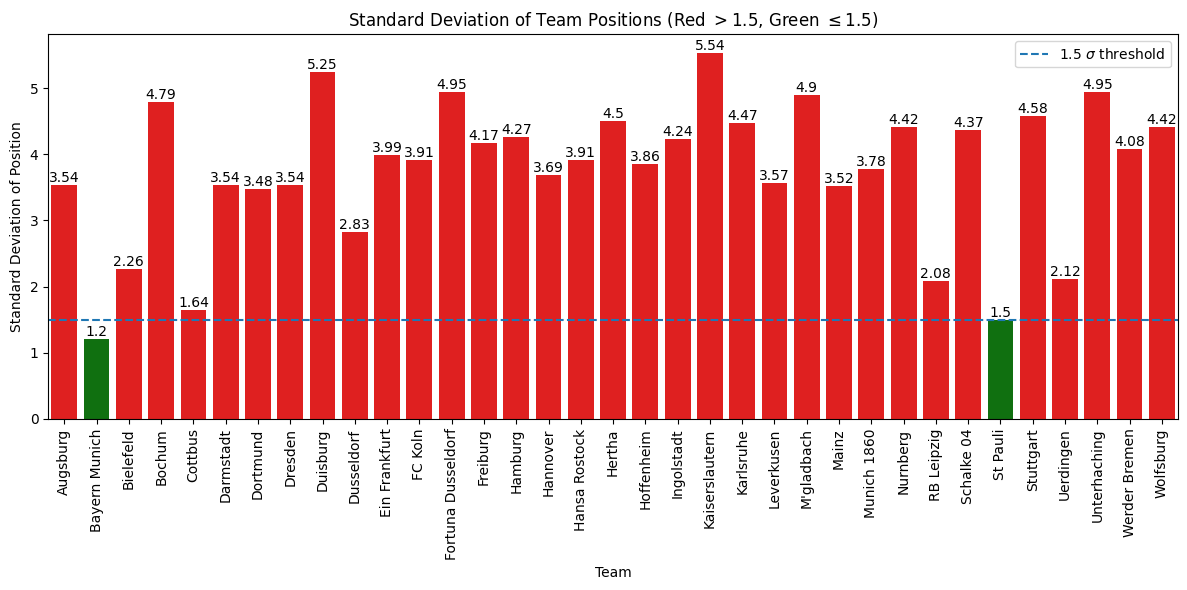

In [97]:

colors = ['red' if x > 1.5 else 'green' for x in sd_pos['POSITION']]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='TEAM', y='POSITION', data=sd_pos, palette=colors)
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])

plt.xticks(rotation=90)
plt.title('Standard Deviation of Team Positions (Red $> 1.5$, Green $\leq 1.5$)')
plt.ylabel('Standard Deviation of Position')
plt.xlabel('Team')
plt.axhline(y=1.5, label='1.5 $\sigma$ threshold', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show();


## Part 4: Rivalries & Big Match Patterns

1. Head-to-Head Matrix for Selected Rivalries

• Select 5 key rivalries.\
• Create a facet grid of win/draw/loss bar charts per rivalry.\
• Annotate biggest win margins.

Biggest rivalaries in Bundesliga:\
Bayern Munich - Borussia Dortmund\
Borussia Dortmund - Schalke\
Bayern Munich - Borussia Mönchengladbach\
Cologne - Borussia Mönchengladbach\
Hamburg - Werder Bremen

In [98]:
rival_df = bundesliga
rivalaries = [
    ('Bayern Munich', 'Dortmund'),
    ('Dortmund', 'Schalke 04'),
    ('Bayern Munich', 'M\'gladbach'),
    ('FC Koln', 'M\'gladbach'),
    ('Hamburg', 'Werder Bremen')
]

rival_df = rival_df[rival_df.apply(
    lambda row: (row['HOMETEAM'], row['AWAYTEAM']) in rivalaries or 
                (row['AWAYTEAM'], row['HOMETEAM']) in rivalaries, axis=1
)]

rival_df['HOMEWIN'] = (rival_df['FTHG'] > rival_df['FTAG']).astype(int)
rival_df['AWAYWIN'] = (rival_df['FTAG'] > rival_df['FTHG']).astype(int)
rival_df['DRAW'] = (rival_df['FTHG'] == rival_df['FTAG']).astype(int)

rival_df.head()

,SEASON,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTHG,FTAG,FTTG,YEAR,HOMEWIN,AWAYWIN,DRAW
16,1994,Bundesliga 1,1993-08-14,Schalke 04,Dortmund,1-0,1,0,1,1993,1,0,0
72,1994,Bundesliga 1,1993-09-25,Dortmund,Bayern Munich,1-1,1,1,2,1993,0,0,1
116,1994,Bundesliga 1,1993-10-23,Werder Bremen,Hamburg,0-2,0,2,2,1993,0,1,0
163,1994,Bundesliga 1,1993-12-04,Dortmund,Schalke 04,1-1,1,1,2,1993,0,0,1
225,1994,Bundesliga 1,1994-03-19,Bayern Munich,Dortmund,0-0,0,0,0,1994,0,0,1


In [99]:
new_df=rival_df.groupby(['HOMETEAM', 'AWAYTEAM']).sum().reset_index()

In [100]:
new_df['TEAM1_WIN'] = pd.Series([0]* len(df['AWAYTEAM']))
new_df['TEAM2_WIN'] = pd.Series([0]* len(df['AWAYTEAM']))
new_df['DRAWALL'] = pd.Series([0]* len(df['AWAYTEAM']))

new_df['PAIR'] = new_df['HOMETEAM'] + '  ' + new_df['AWAYTEAM']
for i, pair in enumerate(new_df['PAIR']):
    new_df['PAIR'].iloc[i] = pair.split('  ')

for i, x in enumerate(new_df['PAIR']):
    for j, z in enumerate(new_df['PAIR']):
        if x == z[::-1]:
            new_df['TEAM1_WIN'].iloc[i] = new_df['HOMEWIN'].iloc[i] + new_df['AWAYWIN'].iloc[j]
            new_df['TEAM2_WIN'].iloc[i] = new_df['HOMEWIN'].iloc[j] + new_df['AWAYWIN'].iloc[i]
            new_df['DRAWALL'].iloc[i] = new_df['DRAW'].iloc[i] + new_df['DRAW'].iloc[j]

seen_pairs = []

rows_to_drop = []

for i, x in enumerate(new_df['PAIR']):
    if x[::-1] in seen_pairs:
        rows_to_drop.append(i)
    else:
        seen_pairs.append(x)

new_df = new_df.drop(rows_to_drop).reset_index(drop=True)

for i, pair in enumerate(new_df['PAIR']):
    new_df['PAIR'].iloc[i]=' vs '.join(pair)

new_df = new_df[['PAIR', 'TEAM1_WIN', 'TEAM2_WIN', 'DRAWALL']]
new_df['MARGIN'] = abs(new_df['TEAM1_WIN'] - new_df['TEAM2_WIN'])

In [101]:
new_df=new_df.sort_values('MARGIN')

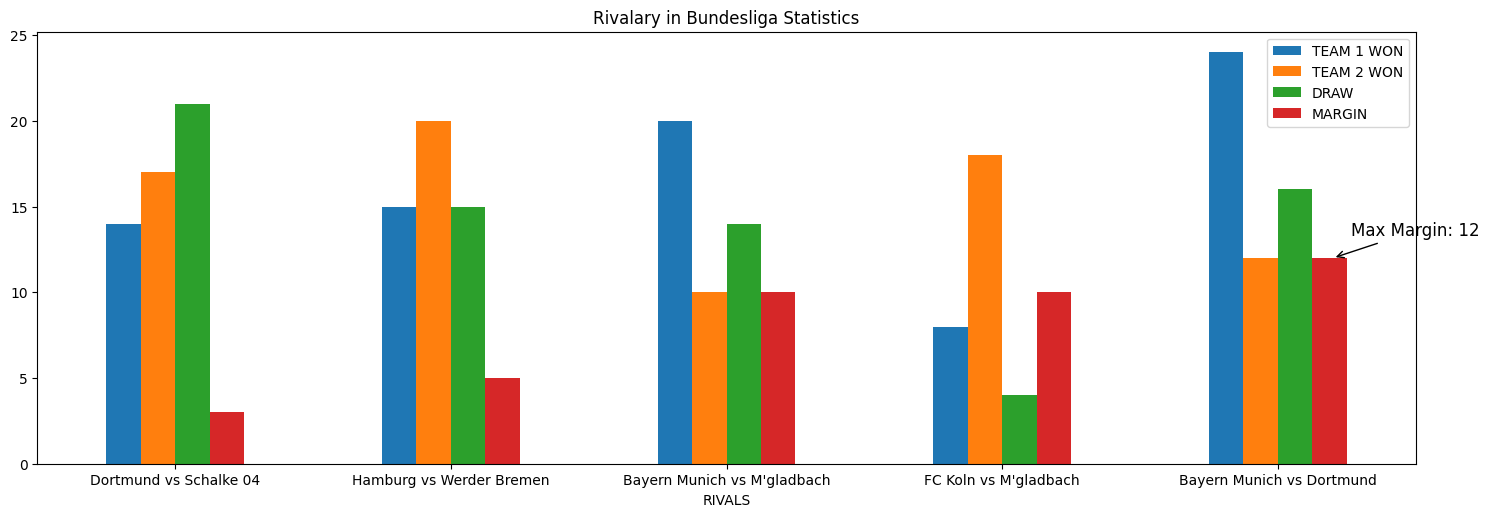

In [102]:
fig, ax = plt.subplots(figsize=(15, 7))
new_df.plot(x='PAIR', y=['TEAM1_WIN', 'TEAM2_WIN', 'DRAWALL', 'MARGIN'], kind='bar', ax=ax)

max_margin_idx = new_df['MARGIN'].idxmax()
max_margin_value = new_df['MARGIN'].max()

x_pos = new_df.index.get_loc(max_margin_idx)

ax.annotate(f'Max Margin: {max_margin_value}', 
            xy=(x_pos+0.2, max_margin_value), 
            xytext=(x_pos+0.5, max_margin_value + 1.3),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='center', fontsize=12, color='black')
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.legend(['TEAM 1 WON', 'TEAM 2 WON', 'DRAW', 'MARGIN'])
plt.title('Rivalary in Bundesliga Statistics')
ax.set_xlabel('RIVALS');

2. Upset Visualizer

• Define “upset” as a team >8 places below beating a top-5 team.\
• Scatterplot of upsets: x-axis = rank difference, y-axis = goal difference.\
• Encode team colors; highlight and label famous upsets

In [103]:
bundesliga['WINNER'] = bundesliga['HOMETEAM']
bundesliga['LOOSER'] = bundesliga['HOMETEAM']
for i, team in enumerate(bundesliga['WINNER']):
    if bundesliga['HOMEWIN'].iloc[i] == 0 and bundesliga['AWAYWIN'].iloc[i]==1:
        bundesliga['WINNER'].iloc[i] = bundesliga['AWAYTEAM'].iloc[i]
        bundesliga['LOOSER'].iloc[i] = bundesliga['HOMETEAM'].iloc[i]
    elif bundesliga['HOMEWIN'].iloc[i] == 1 and bundesliga['AWAYWIN'].iloc[i]==0:
        bundesliga['LOOSER'].iloc[i] = bundesliga['AWAYTEAM'].iloc[i]
        bundesliga['WINNER'].iloc[i] = bundesliga['HOMETEAM'].iloc[i]
    else:
        bundesliga['WINNER'].iloc[i] = np.nan
        bundesliga['LOOSER'].iloc[i] = np.nan
bundesliga.head()

,SEASON,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTHG,FTAG,FTTG,YEAR,HOMEWIN,AWAYWIN,WINNER,LOOSER
0,1994,Bundesliga 1,1993-08-07,Bayern Munich,Freiburg,3-1,3,1,4,1993,1,0,Bayern Munich,Freiburg
1,1994,Bundesliga 1,1993-08-07,Dortmund,Karlsruhe,2-1,2,1,3,1993,1,0,Dortmund,Karlsruhe
2,1994,Bundesliga 1,1993-08-07,Duisburg,Leverkusen,2-2,2,2,4,1993,0,0,NaN,NaN
3,1994,Bundesliga 1,1993-08-07,FC Koln,Kaiserslautern,0-2,0,2,2,1993,0,1,Kaiserslautern,FC Koln
4,1994,Bundesliga 1,1993-08-07,Hamburg,Nurnberg,5-2,5,2,7,1993,1,0,Hamburg,Nurnberg


In [104]:
upset_df = bundesliga
upset_df['GOAL_DIFF'] = abs(upset_df['FTHG'] - upset_df['FTAG'])
upset_df = upset_df[['SEASON', 'WINNER', 'LOOSER', 'GOAL_DIFF']]

In [105]:
upset_df=upset_df.dropna()
upset_df.head()

,SEASON,WINNER,LOOSER,GOAL_DIFF
0,1994,Bayern Munich,Freiburg,2
1,1994,Dortmund,Karlsruhe,1
3,1994,Kaiserslautern,FC Koln,2
4,1994,Hamburg,Nurnberg,3
6,1994,Ein Frankfurt,M'Gladbach,4


In [106]:
bundesliga2

,TEAM,M,W,D,L,GF,GA,DIFF,POINTS,POSITION,SEASON
0,Bayern Munich,34,17,10,7,68,37,31,61,1,1994
1,Kaiserslautern,34,18,7,9,64,36,28,61,2,1994
2,Dortmund,34,15,9,10,49,45,4,54,3,1994
3,Ein Frankfurt,34,15,8,11,57,41,16,53,4,1994
4,Leverkusen,34,14,11,9,60,47,13,53,5,1994
...,...,...,...,...,...,...,...,...,...,...,...
463,Schalke 04,34,8,9,17,37,55,-18,33,14,2019
464,Augsburg,34,8,8,18,51,71,-20,32,15,2019
465,Stuttgart,34,7,7,20,32,70,-38,28,16,2019
466,Hannover,34,5,6,23,31,71,-40,21,17,2019


In [107]:
upset_df['WINNER_POSITION'] = pd.Series([0]* len(upset_df['GOAL_DIFF']))
upset_df['LOOSER_POSITION'] = pd.Series([0]* len(upset_df['GOAL_DIFF']))
position = bundesliga2
position_dict = position.set_index(['TEAM', 'SEASON'])['POSITION'].to_dict()

for i in range(len(upset_df['WINNER_POSITION'])):
    upset_df['WINNER_POSITION'].iloc[i] = position_dict.get((upset_df['WINNER'].iloc[i], str(upset_df['SEASON'].iloc[i])))
    upset_df['LOOSER_POSITION'].iloc[i] = position_dict.get((upset_df['LOOSER'].iloc[i], str(upset_df['SEASON'].iloc[i])))

print(position_dict.get((upset_df['WINNER'].iloc[1], str(upset_df['SEASON'].iloc[1]))))

3


In [108]:
upset_df['WINNER_POSITION']=upset_df['WINNER_POSITION'].astype(int)
upset_df['LOOSER_POSITION']=upset_df['LOOSER_POSITION'].astype(int)

In [109]:
upset_df = upset_df[upset_df['WINNER_POSITION']>=5]

In [110]:
upset_df['RANK_DIFF'] = upset_df['LOOSER_POSITION'] - upset_df['WINNER_POSITION']
upset_df.head()

,SEASON,WINNER,LOOSER,GOAL_DIFF,WINNER_POSITION,LOOSER_POSITION,RANK_DIFF
4,1994,Hamburg,Nurnberg,3,12,16,4
7,1994,Wattenscheid,Schalke 04,3,17,14,-3
8,1994,Werder Bremen,Stuttgart,4,10,8,-2
9,1994,Duisburg,Dresden,1,7,13,6
11,1994,Freiburg,Wattenscheid,3,15,17,2


In [111]:
upset_df['UPSET'] = upset_df['LOOSER_POSITION'] - upset_df['WINNER_POSITION']
upset_df['UPSET']=upset_df['UPSET'].apply(lambda x: True if x>8 else False)
upset_df = upset_df[upset_df['UPSET'] == True]
upset_df.head()

,SEASON,WINNER,LOOSER,GOAL_DIFF,WINNER_POSITION,LOOSER_POSITION,RANK_DIFF,UPSET
25,1994,Leverkusen,Wattenscheid,1,5,17,12,True
43,1994,Stuttgart,Wattenscheid,2,8,17,9,True
61,1994,Duisburg,Wattenscheid,2,7,17,10,True
86,1994,Leverkusen,Nurnberg,4,5,16,11,True
105,1994,Leverkusen,Schalke 04,4,5,14,9,True


If we assume that top upset is the team with highest rank difference and smallest goal difference the plot will look like this:

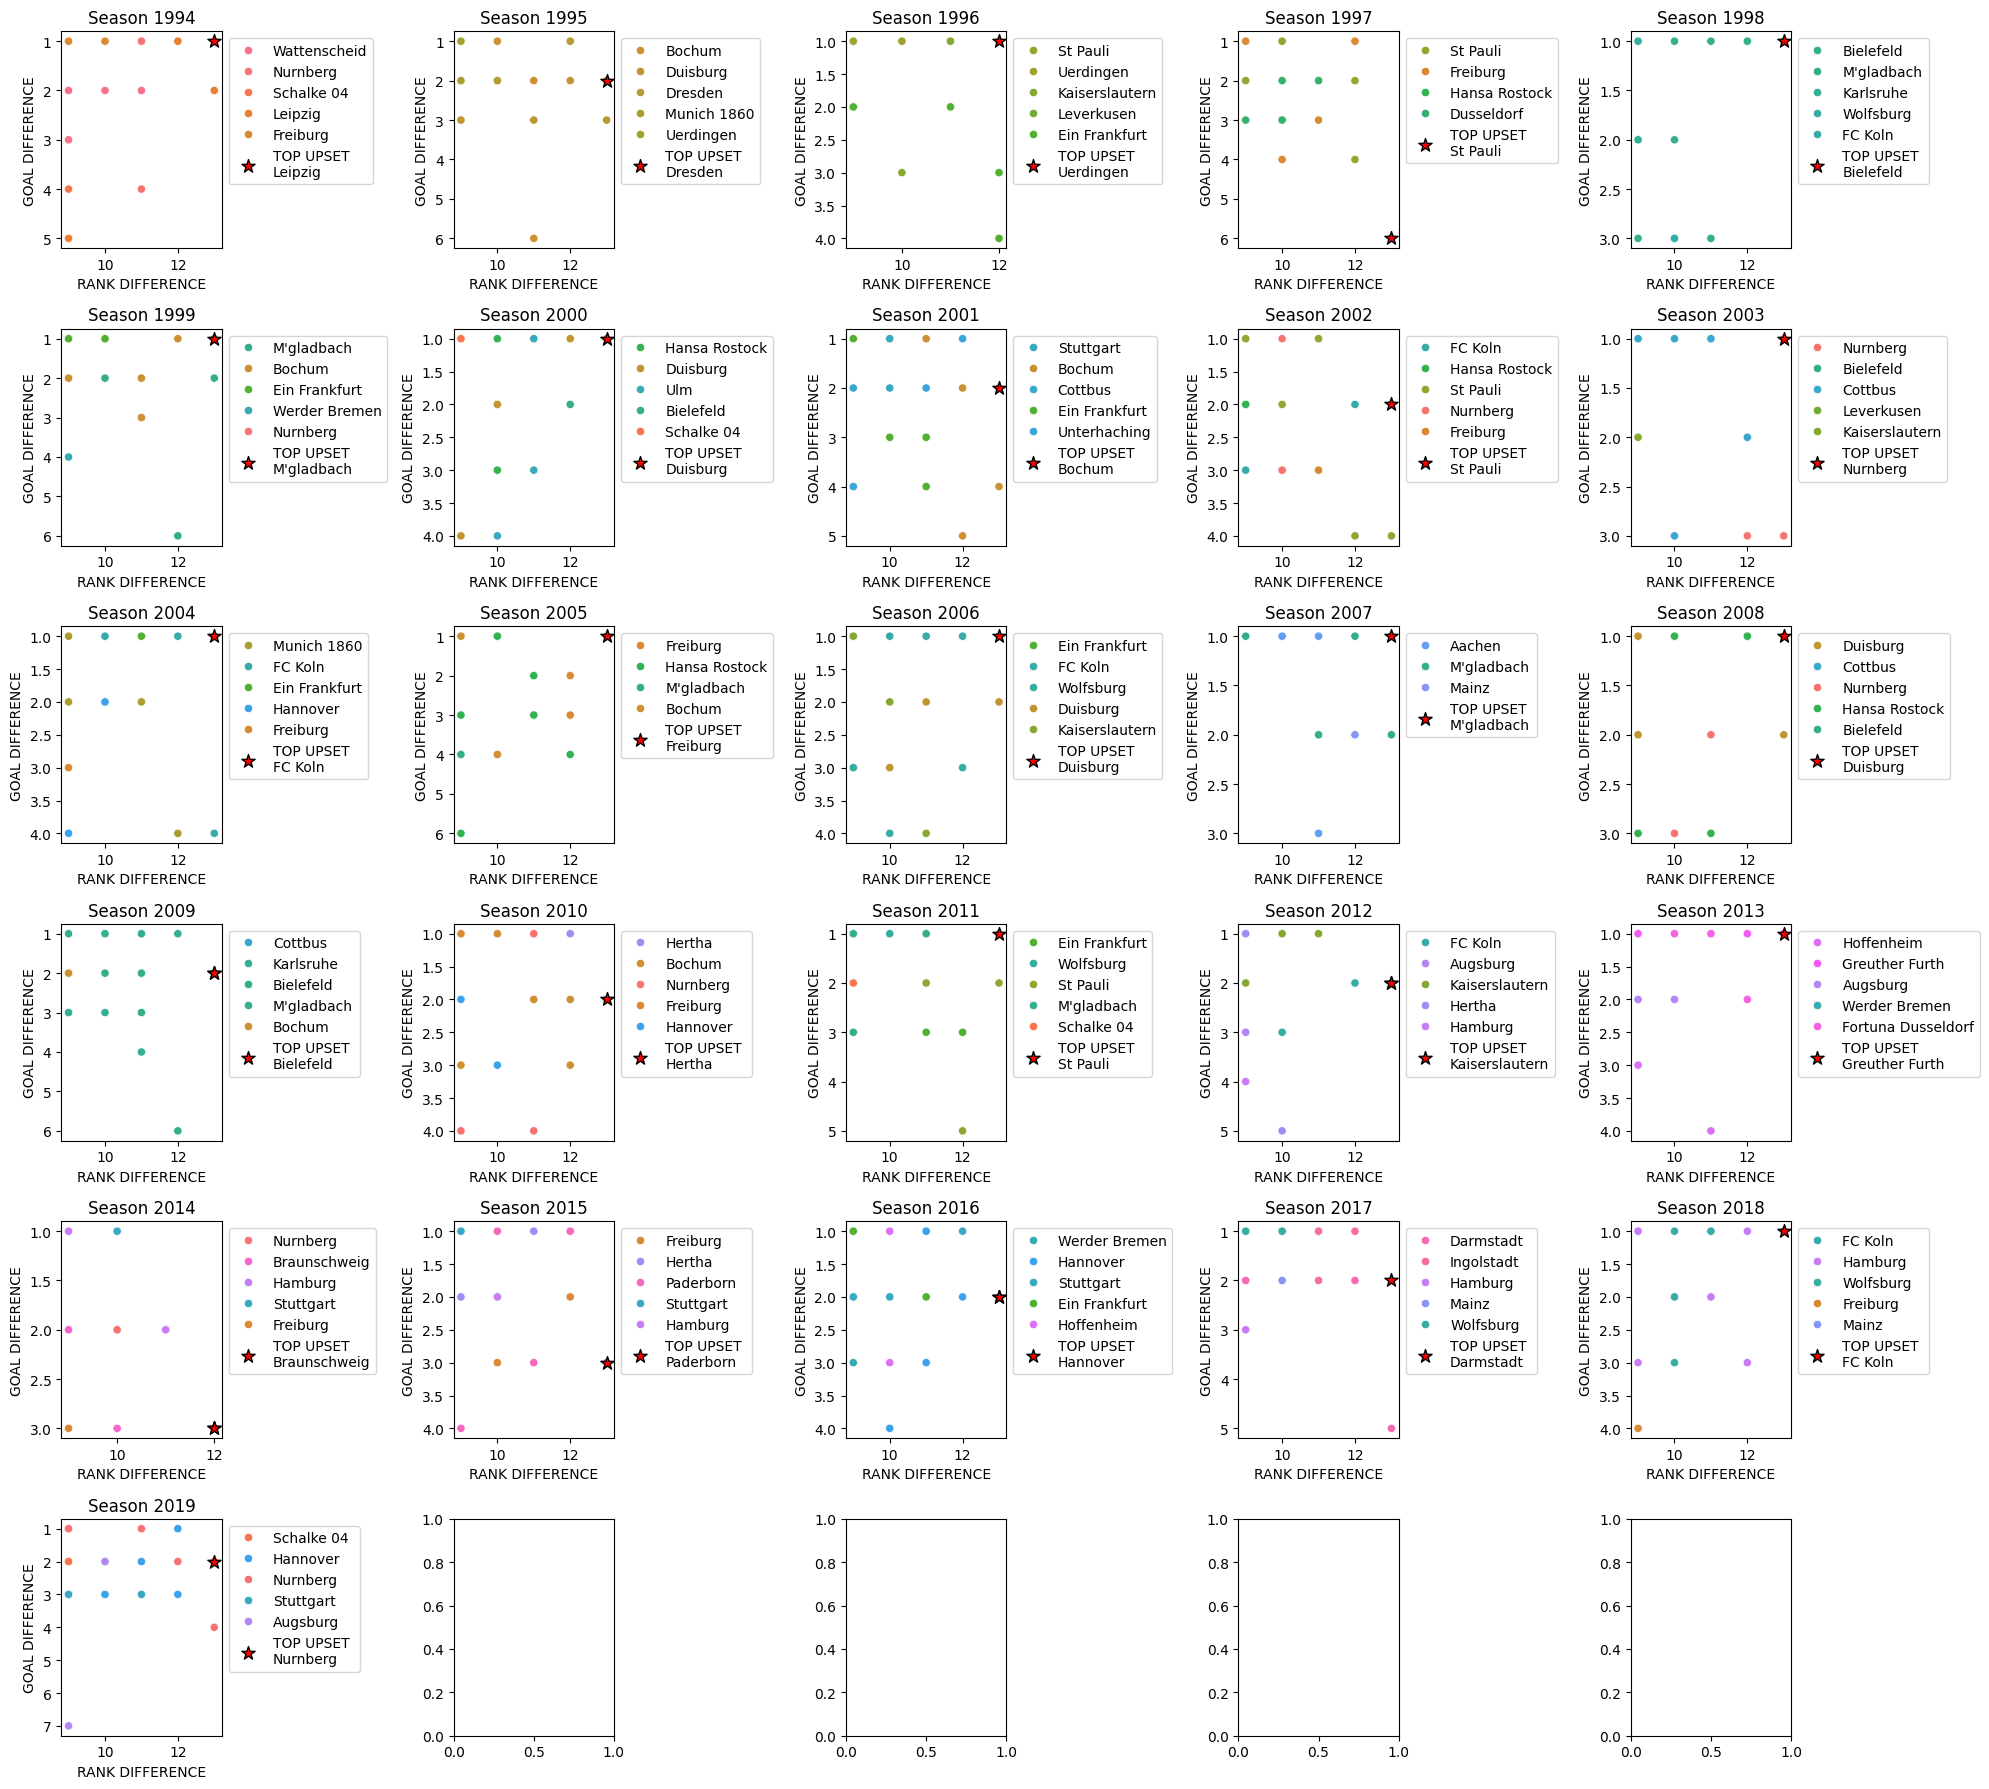

In [112]:
unique_teams = upset_df['LOOSER'].unique()
unique_seasons = upset_df['SEASON'].unique()
team_colors = sns.color_palette("husl", len(unique_teams)) 
team_color_mapping = dict(zip(unique_teams, team_colors))

fig, axes = plt.subplots(6, 5, figsize=(20, 18))
axes = axes.flatten()

for i, season in enumerate(unique_seasons):
    ax = axes[i]
    season_upset = upset_df[upset_df['SEASON'] == season]
    
    season_upset['COLOR'] = season_upset['LOOSER'].map(team_color_mapping)
    top_upset_rank = season_upset.loc[season_upset['RANK_DIFF'] == season_upset['RANK_DIFF'].max()]
    top_upset = top_upset_rank.loc[top_upset_rank['GOAL_DIFF'] == top_upset_rank['GOAL_DIFF'].min()]
    
    plot = sns.scatterplot(x='RANK_DIFF', y='GOAL_DIFF', hue='LOOSER', palette=team_color_mapping, data=season_upset, ax=ax)
    top_upset_team = top_upset['LOOSER'].iloc[0]
    ax.scatter(top_upset['RANK_DIFF'], top_upset['GOAL_DIFF'], color='red', s=100, label='TOP UPSET \n'+str(top_upset_team), edgecolor='black', marker='*')
    ax.set_title(f"Season {season}")  
    ax.set_xlabel('RANK DIFFERENCE')
    ax.set_ylabel('GOAL DIFFERENCE')
    ax.legend()
    ax.invert_yaxis()
    sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()



## Part 5: Overall performance

• Define unique color for each team per season. For each season create horizontal bar plot using total
number of points. Highlighting the winner with the unique color that you assigned to it. Save all
graphs in pdf. (R)\
• Redo the same task in python. But instead of total points use goal difference. Use same logic for colors
as in first part. (Python)

In [113]:
df = bundesliga2

seasons = df['SEASON'].unique()

with PdfPages('bundesliga_gd_plots_python.pdf') as pdf:
    for season in seasons:
        season_data = df[df['SEASON'] == season].sort_values('DIFF')
        
        champion_row = season_data[season_data['POSITION'] == 1]
        champion = champion_row['TEAM'].values[0]

        teams = df['TEAM'].unique()
        team_colors = sns.color_palette("husl", len(teams))
        team_color_mapping = dict(zip(teams, team_colors))
        
        plt.figure(figsize=(25, 12))
        bars = plt.barh(season_data['TEAM'], season_data['DIFF'], 
                        color=[team_color_mapping[team] for team in season_data['TEAM']])
        
        if champion:
            for i, team in enumerate(season_data['TEAM']):
                if team == champion:
                    bars[i].set_edgecolor('black')
                    bars[i].set_linewidth(2)
                    plt.text(season_data['DIFF'].iloc[i]+1, i, 'Winner', 
                             fontsize=12, fontweight='bold', color='black', va='center')
        
        plt.title(f'Bundesliga {season} - Goal Difference by Team', fontsize=14, fontweight='bold')
        plt.xlabel('Goal Difference')
        plt.ylabel('Team')
        plt.tight_layout()
        
        pdf.savefig()
        plt.close()


## Part 6. Monte Carlo simulation.

Use Monte Carlo simulation to predict how many goals will Bayern Munchen score for next 10 seasons. Re-
peat the same for Bayer Leverkusen and Borusia Dortmund. Compare results using appropriate visualization
technique.

In [114]:
bundesliga2.head()

,TEAM,M,W,D,L,GF,GA,DIFF,POINTS,POSITION,SEASON
0,Bayern Munich,34,17,10,7,68,37,31,61,1,1994
1,Kaiserslautern,34,18,7,9,64,36,28,61,2,1994
2,Dortmund,34,15,9,10,49,45,4,54,3,1994
3,Ein Frankfurt,34,15,8,11,57,41,16,53,4,1994
4,Leverkusen,34,14,11,9,60,47,13,53,5,1994


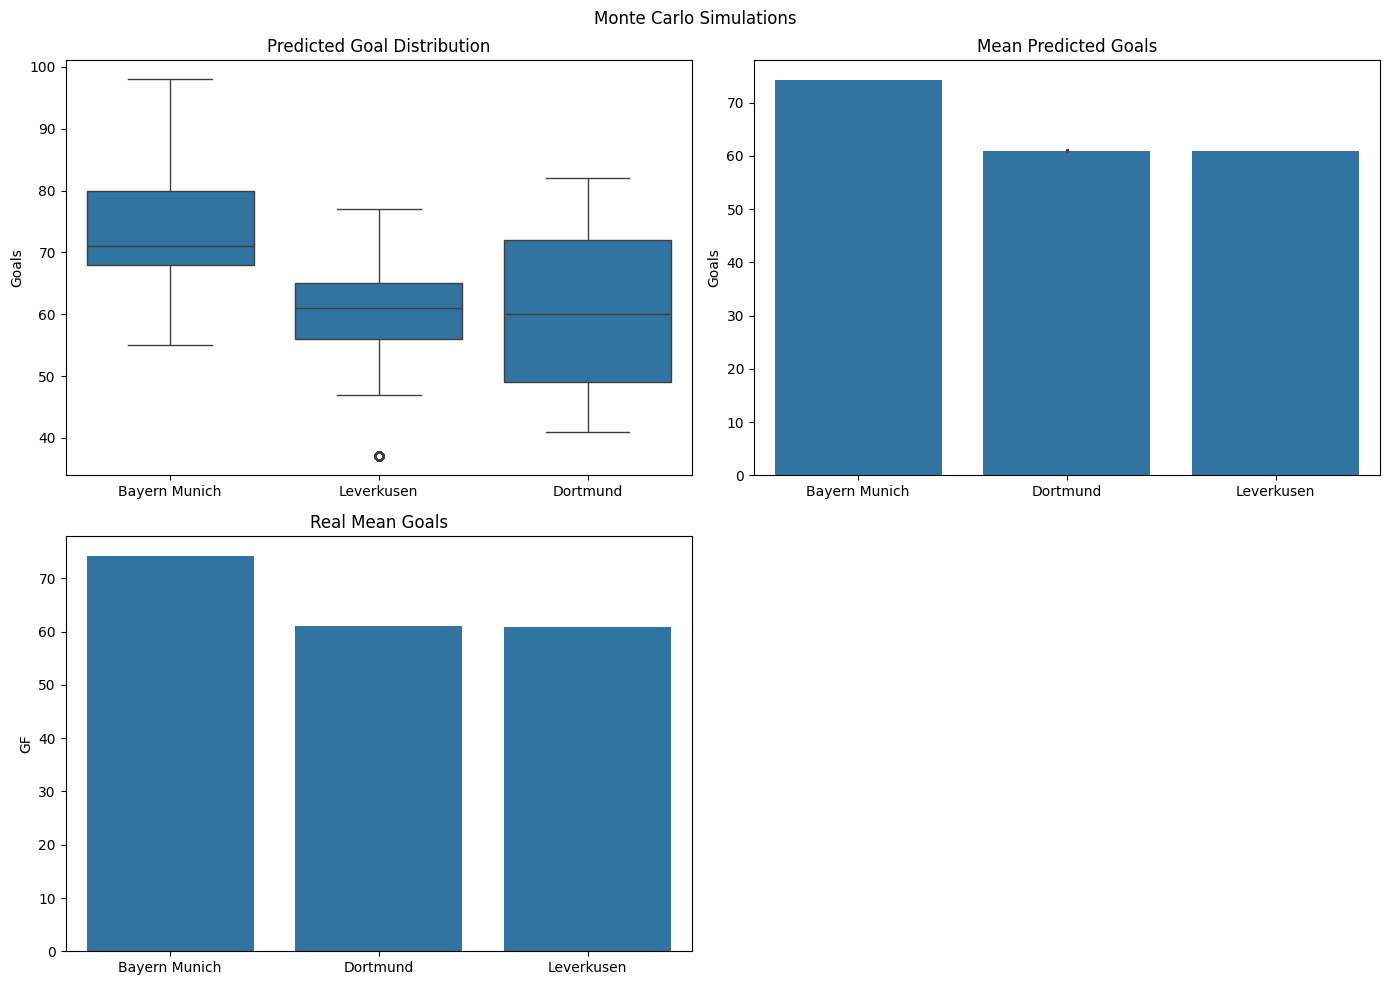

In [122]:
df = bundesliga2
teams = ['Bayern Munich', 'Leverkusen', 'Dortmund']

df_filtered = df[(df['TEAM']=='Bayern Munich') | (df['TEAM']=='Leverkusen') | (df['TEAM']=='Dortmund')]

num_simulations = 100000
results = []

def monte_carlo_goals(team, num_simulations, data):
    team_data = data[data['TEAM'] == team]['GF']
    
    simulations = np.random.choice(team_data, (num_simulations, 10), replace=True)
    
    result_df = pd.DataFrame(simulations)
    result_df['Simulation'] = np.arange(1, num_simulations+1)
    result_df = result_df.melt(id_vars=['Simulation'], var_name='Season', value_name='Goals')
    result_df['Team'] = team
    return result_df

for team in teams:
    simulation = monte_carlo_goals(team, num_simulations, df_filtered)
    results.append(simulation)

simulation_df = pd.concat(results)

mean_goals_df = simulation_df.groupby(['Season', 'Team']).mean().reset_index()[['Season', 'Team', 'Goals']]
mean_goals_df['Season'] = mean_goals_df['Season'] + 1
mean_goals_df

mean_real_df = df[(df['TEAM']=='Bayern Munich') | (df['TEAM']=='Leverkusen') | (df['TEAM']=='Dortmund')].groupby('TEAM').mean()
fig, ax = plt.subplots(2,2, figsize=(14,10))

sns.boxplot(data=simulation_df, x='Team', y='Goals', ax=ax[0][0])
ax[0][0].set_title('Predicted Goal Distribution')
ax[0][0].set_xlabel('')

sns.barplot(data=mean_goals_df, x='Team', y='Goals', ax=ax[0][1])
ax[0][1].set_title('Mean Predicted Goals')
plt.suptitle('Monte Carlo Simulations')
ax[0][1].set_xlabel('')
sns.barplot(data=mean_real_df, x='TEAM', y='GF', ax=ax[1][0])
ax[1][0].set_title('Real Mean Goals')
ax[1][0].set_xlabel('')
ax[1][1].set_axis_off()
plt.tight_layout();


After running 100000 simulations 50% of Bayern Munich results were among ~67-79 goals whihc is quite realistic(Mean simulation result is ~75 goals, real mean is around ~75)\
Similarly for Dortmund 50% of simulation predictions is aroud ~57-65(Mean of predictions is ~60, real mean is ~60 goals)\
For Leverkusen 50% of simulation predictions is very wide from ~50-75 but the mean of predictions is really close to Dortmund which is also true for real mean 60 goals.